# Linear regression - from first principles

In [1]:
import numpy as np
import matplotlib.pyplot as plt
import math

In [2]:
def compute_h(theta, x):
    return theta[0] + x*(theta[1:len(theta)])

In [3]:
def computePartial(index, theta, x, y):
    
    retVal = 0
    
    #Iterate over all training examples
    
    if index == 0:
        
        for i in range(0, len(x)):
            retVal += (compute_h(theta, x[i]) - y[i])

    else:
    
        for i in range(0, len(x)):
            retVal += (compute_h(theta, x[i]) - y[i])*x[i]
    
    retVal /= len(x)
    return retVal

In [4]:
def cost_func(theta, x, y):

    cost = 0

    for i in range(0, len(x)):
        cost += math.pow((compute_h(theta, x[i]) - y[i]), 2)

    cost = cost/(2*len(x))

    return cost

In [27]:
def grad_desc(theta_values, X, y, lr=.001, converge_change=.00001):
    
    #setup cost iter
    cost_iter = []
    cost = cost_func(theta_values, X, y)
    cost_iter.append([0, cost])
    change_cost = 1
    i = 1
    
    while(change_cost > converge_change):
        old_cost = cost
        
        theta_values[0] = theta_values[0] - lr*computePartial(0, theta_values, X, y)
        theta_values[1] = theta_values[1] - lr*computePartial(1, theta_values, X, y)
        
        cost = cost_func(theta_values, X, y)
        cost_iter.append([i, cost])
        change_cost = old_cost - cost
        i+=1
    
    return theta_values, np.array(cost_iter)

In [28]:
def pred_values(theta, X, hard=True):
    #normalize
    #X = (X - np.mean(X, axis=0)) / np.std(X, axis=0)
    pred_prob = logistic_func(theta, X)
    pred_value = np.where(pred_prob >= .5, 1, 0)
    if hard:
        return pred_value
    return pred_prob

In [29]:
from sklearn.model_selection import train_test_split

# Generate a dataset of random points normally distributed around a linear function
# We will try to fit and obtain the line's initial parameters

gradient = 2.5
intercept = 3

x = np.linspace(0, 10, 50)
y = gradient*x + intercept

data = []

for i in range(0, len(y)):
    y[i] = y[i] + np.random.normal(0, 0.5)
    data.append([x[i], y[i]])

data = np.array((data))

X = np.array(data[:, 0])
y = np.array(data[:, 1])

print("Input")
print(X)
print("Output")
print(y)

X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2)

Input
[ 0.          0.20408163  0.40816327  0.6122449   0.81632653  1.02040816
  1.2244898   1.42857143  1.63265306  1.83673469  2.04081633  2.24489796
  2.44897959  2.65306122  2.85714286  3.06122449  3.26530612  3.46938776
  3.67346939  3.87755102  4.08163265  4.28571429  4.48979592  4.69387755
  4.89795918  5.10204082  5.30612245  5.51020408  5.71428571  5.91836735
  6.12244898  6.32653061  6.53061224  6.73469388  6.93877551  7.14285714
  7.34693878  7.55102041  7.75510204  7.95918367  8.16326531  8.36734694
  8.57142857  8.7755102   8.97959184  9.18367347  9.3877551   9.59183673
  9.79591837 10.        ]
Output
[ 2.89399401  3.4724102   3.55756777  4.94938685  6.18131462  5.11147934
  5.63258559  6.60183774  7.14858802  6.89939151  8.67554976  8.93222034
  8.60499936  9.6853551  10.51868599 10.45355163 11.40486577 11.51626655
 12.12595855 13.07982402 12.34328248 12.74752326 13.60950607 14.33719419
 14.90809958 16.04822071 16.4786112  17.16648787 16.4029978  17.96848245
 18.59283842

In [30]:
thetas = np.zeros(2)
fitted_values, cost_iter = grad_desc(thetas, X_train, y_train)
print("Fitted theta")
print(fitted_values)

Fitted theta
[2.54495587 2.5711012 ]


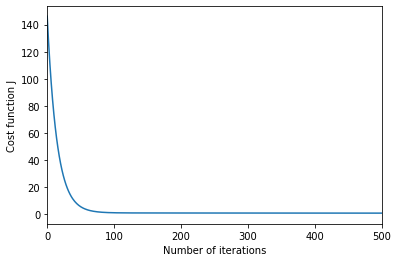

In [34]:
plt.figure()
plt.plot(cost_iter[:,0], cost_iter[:,1])
plt.xlabel("Number of iterations")
plt.ylabel("Cost function J")
plt.xlim([0,500])
plt.show()

In [32]:
fit = thetas[0] + thetas[1]*X_train

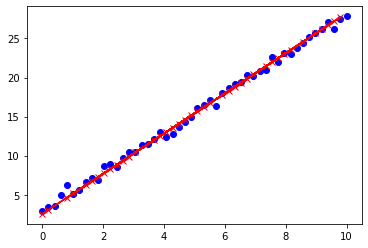

In [33]:
plt.figure()
plt.scatter(X, y, c='b')
plt.plot(X_train, fit, "-rx")
plt.show()

In [12]:
from sklearn.metrics import mean_squared_error, r2_score, mean_absolute_error

fit_test = thetas[0] + thetas[1]*X_test

print("MSE: " + str(mean_squared_error(fit_test, y_test)))
print("MAE: " + str(mean_absolute_error(fit_test, y_test)))
print("R2: " + str(r2_score(fit_test, y_test)))

MSE: 1.6481448996895884
MAE: 1.1178815636529635
R2: 0.9736783315967389


# Linear regression - using sklearn library

In [13]:
from sklearn.linear_model import LinearRegression

In [14]:
lin_reg = LinearRegression()
lin_reg.fit(X_train.reshape(-1, 1), y_train)

LinearRegression()

In [15]:
ypred = lin_reg.predict(X_test.reshape(-1, 1))
print(ypred)

[16.78296939 23.87667758 27.42353168 15.7695825  26.4101448  13.23611529
  8.67587431  7.66248742 10.19595464 12.72942185]


In [16]:
print(lin_reg.coef_, lin_reg.intercept_)

[2.48279787] 3.102246441001686


In [17]:
ypred_train = lin_reg.predict(X_train.reshape(-1, 1))

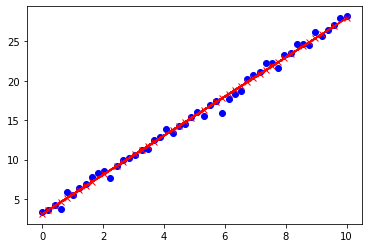

In [18]:
plt.figure()
plt.scatter(X, y, c='b')
plt.plot(X_train, ypred_train, "-rx")
plt.show()

In [19]:
print("MSE: " + str(mean_squared_error(ypred, y_test)))
print("MAE: " + str(mean_absolute_error(ypred, y_test)))
print("R2: " + str(r2_score(ypred, y_test)))

MSE: 0.27034157863190034
MAE: 0.4052921484028202
R2: 0.9943204680360931
